In [10]:
#Linear regression practice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline


In [11]:
df=pd.read_csv('Real estate.csv')
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [3]:
df.shape

(414, 8)

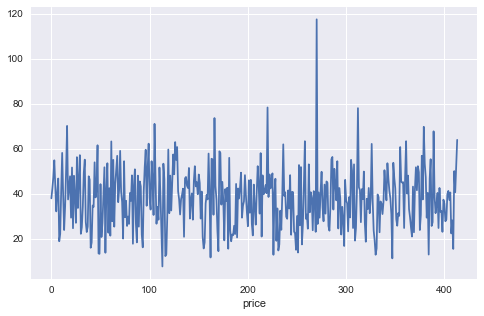

In [17]:
#histogram
plt.figure(figsize=(8,5))
plt.plot(df['Y house price of unit area'])
plt.xlabel('price')
plt.show()

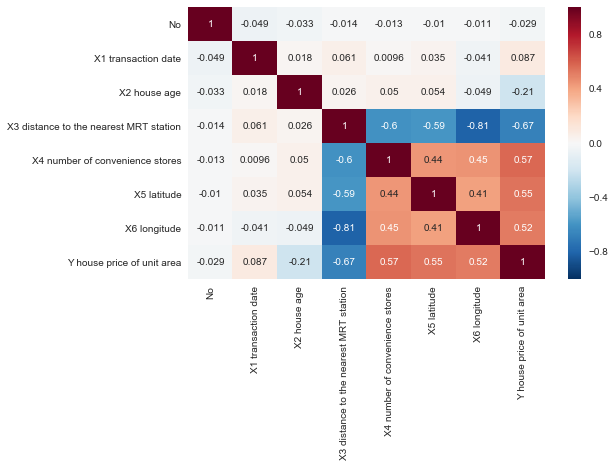

In [21]:
#Correlation table
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

In [11]:
X=df.drop('Y house price of unit area',axis='columns')
Y=df[['Y house price of unit area']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [12]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
model.coef_

array([[ -3.42453376e-03,   5.66260504e+00,  -2.74839538e-01,
         -4.44096934e-03,   1.15095665e+00,   2.12353342e+02,
          3.78519994e+00]])

In [19]:
X.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [21]:
model.intercept_

array([-17118.31541563])

In [28]:
from sklearn import metrics
y_pred=model.predict(X_test)
MAE=metrics.mean_absolute_error(Y_test,y_pred)
MSE=metrics.mean_squared_error(Y_test,y_pred)
RMSE=MSE**(1/2)
pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'],columns=['Values'])

,Values
MAE,5.071119
MSE,44.533078
RMSE,6.673311


In [29]:
df['Y house price of unit area'].mean()

37.98019323671498

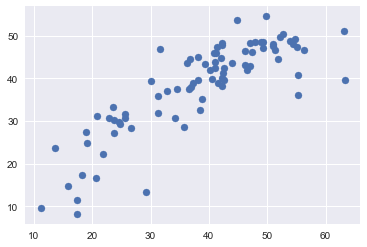

In [32]:
#compare y_test and y_pred plot
plt.scatter(Y_test,y_pred)

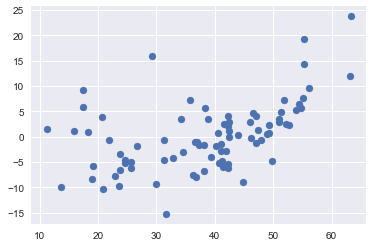

In [34]:
#residual plot: No correlation
residual=Y_test-y_pred
plt.scatter(Y_test,residual)

In [1]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
n=int(input())
input()
inputs=[input().split() for i in range(n)]
calendar={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,
'August':6,'September':5,'October':4,'November':3,'December':2}
from sklearn.linear_model import LinearRegression

for i in [2,3]:
    x_train=[]
    y_train=[]
    test=[]
    for line in inputs:
        year=int(line[0])
        if line[i][0]!='M':
            x_temp=[calendar[line[1]]]
        if line[5-i][0]!='M' and line[i][0]!='M':
            x_train.append(x_temp)
            y_train.append(float(line[i]))
        if line[i][0]=='M':
            test.append(x_temp)
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_predict=model.predict(test)            
    if i==3:
        y_min=y_predict
    else:
        y_max=y_predict
maxi=0
mini=0
for t in inputs:
    if t[2][0] == 'M':
        print('{:.1f}'.format(float(y_max[maxi])))
        maxi += 1
    elif t[3][0] == 'M':
        print('{:.1f}'.format(float(y_min[mini])))
        mini += 1

KeyboardInterrupt: 

In [9]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.94860813704496794